In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

rng = np.random.default_rng(14159)

In [2]:
# Set parameters
n = 1000 # sample size
p = 600 # dimension
L = 100 # band size
mu_norm = 4

In [3]:
# Make mask
u = np.zeros(n)
toep_seq = np.zeros(n)
for i in range(min(n, L)):
    u[i] = (L-i-1)
    toep_seq[i] = 1
u *= np.sqrt(2/(L*(L-1)))

T = linalg.toeplitz(toep_seq) # Toeplitz mask
Tp = T + np.outer(u, u) + np.outer(u[::-1], u[::-1]) # Additional weights in the corners

In [4]:
# Generate model
mu = np.random.randn(p)
mu = mu_norm*mu/linalg.norm(mu)
y = np.ones(n)
y[:n//2] = -1
X = np.outer(mu, y)+np.random.randn(p, n)
K = X.T@X/p

In [5]:
# Compute eigenvalues and eigenvectors
eigvalsT, eigvecsT = linalg.eigh(K*T)
eigvalsTp, eigvecsTp = linalg.eigh(K*Tp)

# Plots

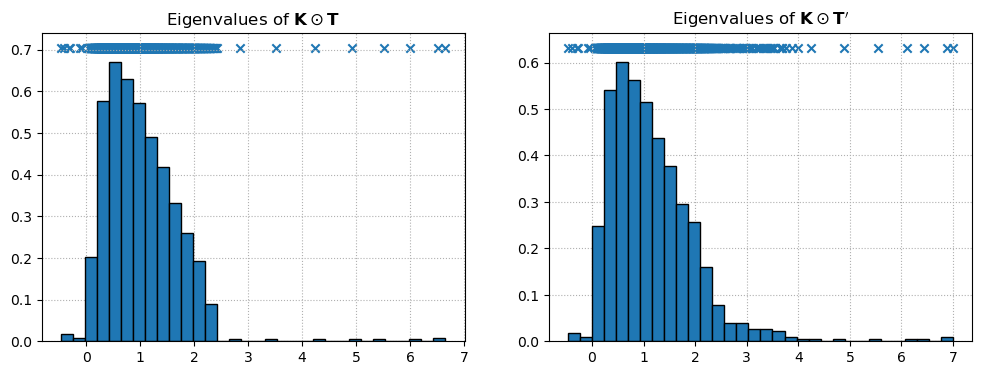

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(eigvalsT, density=True, bins='sqrt', edgecolor='black', zorder=2)
_, ymax = ax1.get_ylim()
ax1.scatter(eigvalsT, [ymax]*n, marker='x')
ax1.grid(ls=':')
ax1.set_title("Eigenvalues of $\\mathbf{K} \\odot \\mathbf{T}$")

ax2.hist(eigvalsTp, density=True, bins='sqrt', edgecolor='black', zorder=2)
_, ymax = ax2.get_ylim()
ax2.scatter(eigvalsTp, [ymax]*n, marker='x')
ax2.grid(ls=':')
ax2.set_title("Eigenvalues of $\\mathbf{K} \\odot \\mathbf{T}'$")

plt.show()

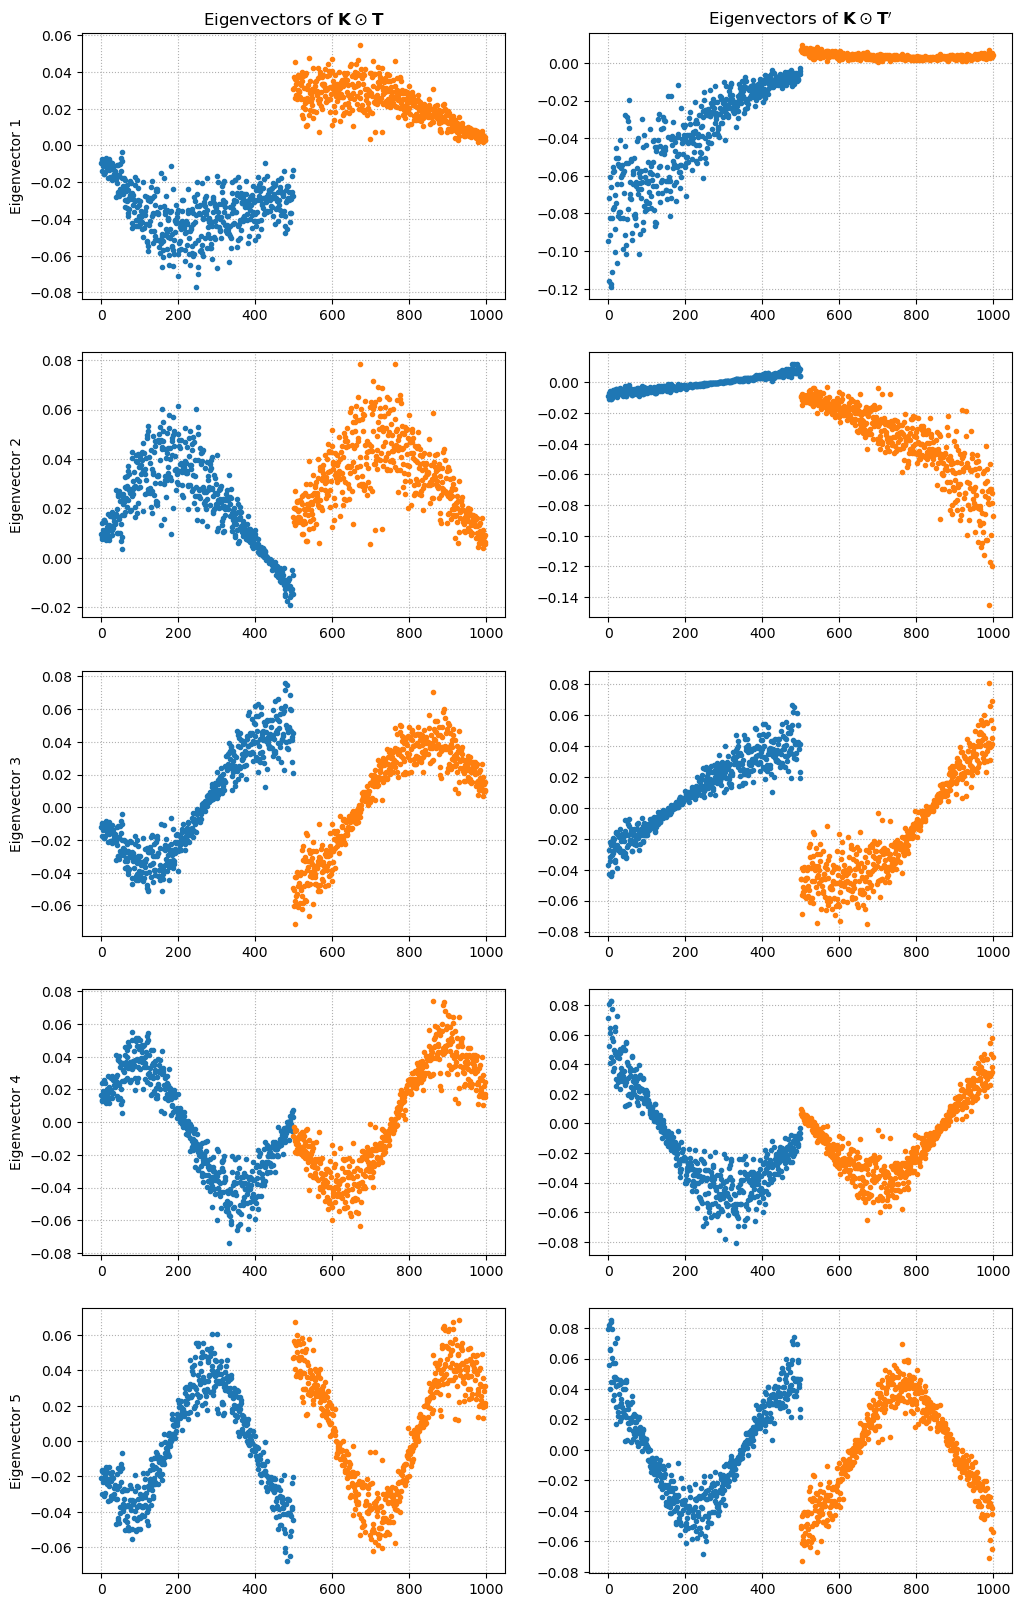

In [7]:
fig, ax = plt.subplots(5, 2, figsize=(12, 20))
xx = np.arange(n)
mask = (y == 1)
for k in range(ax.shape[0]):
    ax[k, 0].plot(xx[~mask], eigvecsT[:, -k-1][~mask], ls='', marker='.', color='C0')
    ax[k, 0].plot(xx[mask], eigvecsT[:, -k-1][mask], ls='', marker='.', color='C1')
    ax[k, 0].grid(ls=':')
    ax[k, 0].set_ylabel("Eigenvector {}".format(k+1))
    ax[k, 1].plot(xx[~mask], eigvecsTp[:, -k-1][~mask], ls='', marker='.', color='C0')
    ax[k, 1].plot(xx[mask], eigvecsTp[:, -k-1][mask], ls='', marker='.', color='C1')
    ax[k, 1].grid(ls=':')
ax[0, 0].set_title("Eigenvectors of $\\mathbf{K} \\odot \\mathbf{T}$")
ax[0, 1].set_title("Eigenvectors of $\\mathbf{K} \\odot \\mathbf{T}'$")
plt.show()